In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/House_price_task_1/train.csv')

In [ ]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
data = data[['GrLivArea','FullBath','BedroomAbvGr','SalePrice']]

<Axes: >

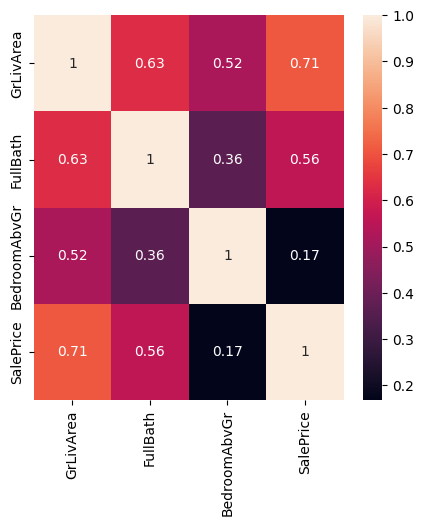

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),annot=True)

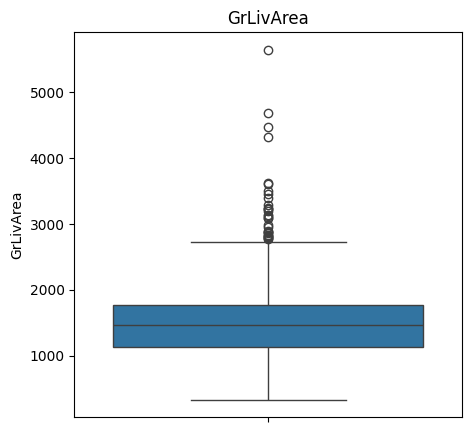

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data['GrLivArea'])
plt.title('GrLivArea')
plt.show()

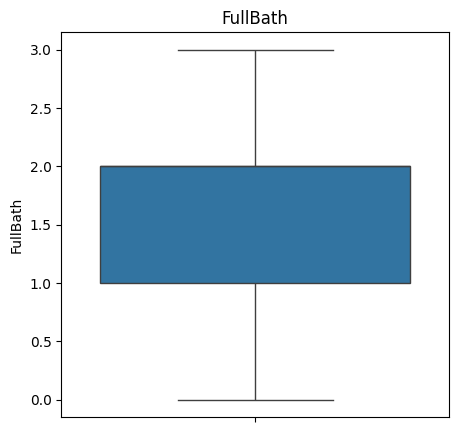

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data['FullBath'])
plt.title('FullBath')
plt.show()

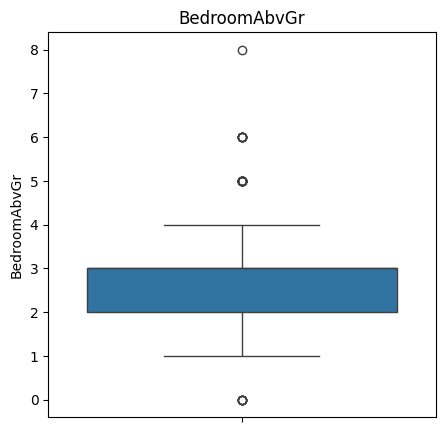

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data['BedroomAbvGr'])
plt.title('BedroomAbvGr')
plt.show()

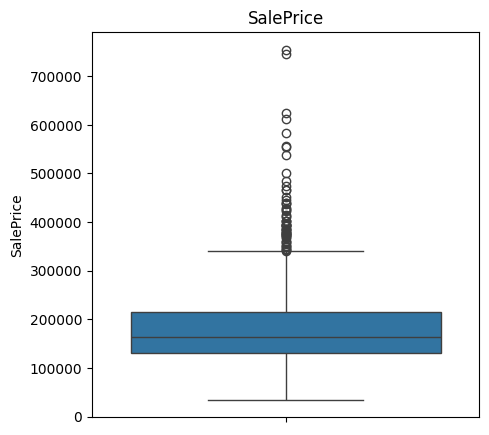

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data['SalePrice'])
plt.title('SalePrice')
plt.show()


In [ ]:
#removing outlirs of GrLivArea
Q1 = data['GrLivArea'].quantile(0.25)
Q3 = data['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['GrLivArea'] >= lower_bound) & (data['GrLivArea'] <= upper_bound)]

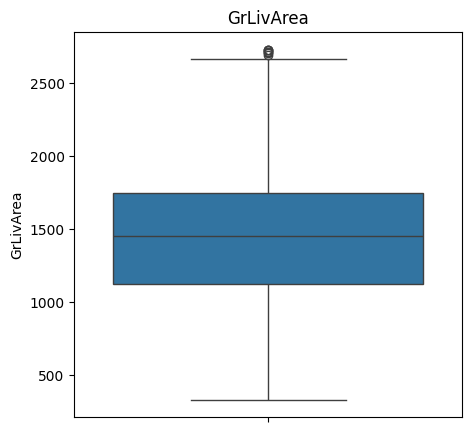

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(data=data['GrLivArea'])
plt.title('GrLivArea')
plt.show()

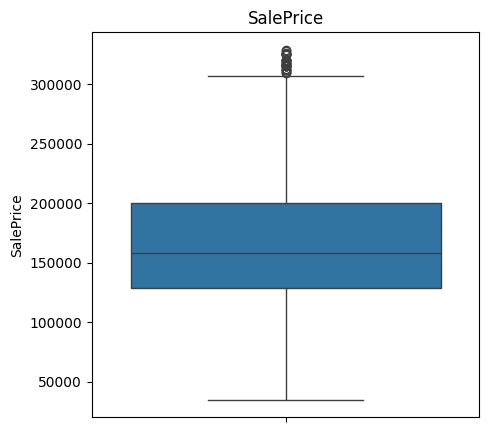

In [ ]:
#removing of outliers from sales price
q1 = data['SalePrice'].quantile(0.25)
q3 = data['SalePrice'].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

data = data[(data['SalePrice'] >= lower) & (data['SalePrice'] <= upper)]

plt.figure(figsize=(5,5))
sns.boxplot(data=data['SalePrice'])
plt.title('SalePrice')
plt.show()



In [ ]:
data.head()

,GrLivArea,FullBath,BedroomAbvGr,SalePrice
0,1710,2,3,208500
1,1262,2,3,181500
2,1786,2,3,223500
3,1717,1,3,140000
4,2198,2,4,250000


In [ ]:
data.isnull().sum()

GrLivArea       0
FullBath        0
BedroomAbvGr    0
SalePrice       0
dtype: int64

In [ ]:
data.shape

(1373, 4)

In [ ]:
data.corr()

,GrLivArea,FullBath,BedroomAbvGr,SalePrice
GrLivArea,1.000000,0.607998,0.552269,0.681464
FullBath,0.607998,1.000000,0.336851,0.567981
BedroomAbvGr,0.552269,0.336851,1.000000,0.179521
SalePrice,0.681464,0.567981,0.179521,1.000000


In [ ]:
x= data[['GrLivArea','FullBath','BedroomAbvGr']]

In [ ]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
y= data['SalePrice']

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
pred = model.predict(x)

In [ ]:
mse = mean_squared_error(y,pred)

In [ ]:
print(mse)

1442459772.3218975


In [ ]:
r2_score = r2_score(y,pred)

In [ ]:
print(r2_score)

0.5577406286342887


In [ ]:
test_data = pd.read_csv('/content/drive/MyDrive/House_price_task_1/test.csv')

In [ ]:
test_data.shape

(1459, 80)

In [ ]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [ ]:
x_test = test_data[['GrLivArea','FullBath','BedroomAbvGr']]
x_test = scaler.transform(x_test)

In [ ]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
pred_test = model.predict(x_test)

In [ ]:
pred_test

array([120993.15018893, 140106.9405905 , 193999.77056734, ...,
       109856.44840683, 107166.83380964, 228040.9394133 ])

In [ ]:
data_point = [[3000,2,3]]
data_point = scaler.transform(data_point)
print(model.predict(data_point))

[319796.11150483]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
